In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
os.chdir("C:\\Users\\an\\Documents\\competition\\LAMOST\\data")

## read train index data

In [3]:
train_index = pd.read_csv("first_train_index_20180131.csv")

In [4]:
train_index.head()

,id,type
0,696220,star
1,911466,star
2,915856,star
3,720026,star
4,1198160,star


### 对type个数进行统计


In [7]:
typeCount = train_index.groupby('type').id.count()
typeCount/typeCount.sum()

type
galaxy     0.010811
qso        0.002817
star       0.915507
unknown    0.070865
Name: id, dtype: float64

In [8]:

temp = pd.read_table("./first_train_data_20180131/"+ str(train_index.loc[1,'id']) +".txt",sep = ',',header = None)

import matplotlib.pyplot as plt
plt.hist(temp)

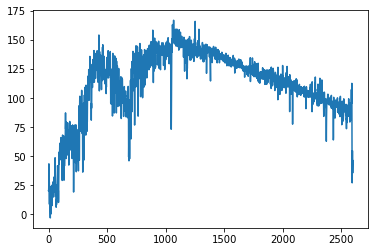

In [9]:
plt.plot(temp.T)

## read multi csv by dask

In [10]:
import glob
fileList = glob.glob("./first_train_data_20180131/*.txt")

In [11]:
fileList = glob.glob("./first_train_data_20180131/*.txt")

In [12]:
fileList.__len__()

483851

## 读取数据

In [117]:
# # csv version , very slow
# import numpy as np
# import re
# import datetime
# np.random.shuffle(fileList)

# sampleList = fileList[:int(.1*len(fileList))]

# dfList = []
# counter = 1
# start = datetime.datetime.now()
# for file in sampleList:
#     counter += 1
#     dfList.append(pd.read_table(file,header = None,sep = ','))
#     if counter %100 == 0:
#         print('counter :' , counter , '  is now running')
#         end = datetime.datetime.now()
#         print(end-start)
    

# dfList = pd.concat(dfList)
# dfList.index =  [  re.split(r'\\|\.',name)[-2] for name in sampleList]


In [23]:
# try to use open function
# csv version , very slow
import numpy as np
import re
import datetime
np.random.shuffle(fileList)

sampleList = fileList

start = datetime.datetime.now()
dfList = []
counter = 1
for file in sampleList:
    counter += 1
    with open(file) as f:
        dfList.append(f.readline())
    if counter %1000 == 0:
        print(counter)
        end = datetime.datetime.now()
        print(end-start)

data = np.stack([np.array(data.split(',')).astype('float32') for data in dfList])
end = datetime.datetime.now()
print(end-start)

1000
0:00:17.481397
2000
0:00:25.539972
3000
0:00:33.705347
4000
0:00:42.191510
5000
0:00:50.410285
6000
0:00:58.380070
7000
0:01:05.588242
8000
0:01:13.538766
9000
0:01:21.035306
10000
0:01:28.332633
11000
0:01:35.591443
12000
0:01:43.239932
13000
0:01:51.675243
14000
0:02:00.007760
15000
0:02:08.404145
16000
0:02:16.590485
17000
0:02:24.450027
18000
0:02:32.335676
19000
0:02:40.490118
20000
0:02:48.156657
21000
0:02:55.564565
22000
0:03:03.297293
23000
0:03:10.930921
24000
0:03:18.764365
25000
0:03:27.107458
26000
0:03:35.454155
27000
0:03:43.415825
28000
0:03:51.602033
29000
0:04:02.813595
30000
0:04:11.565252
31000
0:04:20.301786
32000
0:04:28.673144
33000
0:04:38.073348
34000
0:04:46.412582
35000
0:04:54.921008
36000
0:05:04.010250
37000
0:05:12.070206
38000
0:05:20.936194
39000
0:05:28.970602
40000
0:05:36.636905
41000
0:05:45.263589
42000
0:05:53.651185
43000
0:06:01.988304
44000
0:06:10.059804
45000
0:06:18.249570
46000
0:06:26.658030
47000
0:06:34.316731
48000
0:06:41.495756
4

379000
1:01:33.054440
380000
1:01:40.703740
381000
1:01:48.724357
382000
1:01:56.486797
383000
1:02:04.408510
384000
1:02:12.128797
385000
1:02:19.986092
386000
1:02:27.919126
387000
1:02:35.775340
388000
1:02:43.796947
389000
1:02:52.183330
390000
1:03:00.006886
391000
1:03:08.085187
392000
1:03:15.950774
393000
1:03:23.738023
394000
1:03:31.583535
395000
1:03:39.412803
396000
1:03:47.385970
397000
1:03:55.297564
398000
1:04:03.190397
399000
1:04:11.264824
400000
1:04:18.946869
401000
1:04:26.776760
402000
1:04:34.567515
403000
1:04:42.700586
404000
1:04:50.829160
405000
1:04:58.736253
406000
1:05:06.736922
407000
1:05:14.622200
408000
1:05:22.535981
409000
1:05:30.765024
410000
1:05:38.868643
411000
1:05:46.801903
412000
1:05:54.957097
413000
1:06:03.388203
414000
1:06:11.679371
415000
1:06:19.606879
416000
1:06:27.494323
417000
1:06:35.430004
418000
1:06:43.385203
419000
1:06:51.339187
420000
1:06:59.427217
421000
1:07:07.477300
422000
1:07:15.291306
423000
1:07:23.076227
424000
1:0

# use pandas to save data

In [30]:
data = pd.DataFrame(data,index =  [  re.split(r'\\|\.',name)[-2] for name in sampleList])
# print(data)
import gc
gc.collect()
print(data.info())

# 导出部分数据
data.to_csv("data.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 483851 entries, 921646 to 837806
Columns: 2600 entries, 0 to 2599
dtypes: float32(2600)
memory usage: 4.7+ GB
None


# use pickle to save data first 

In [27]:
import numpy as np
import pandas as pd
from  scipy.sparse import csc_matrix
import pickle



def save_pickle(Object, filename):
    with open(filename, 'wb') as outfile:
        pickle.dump(Object, outfile, pickle.HIGHEST_PROTOCOL)
def load_pickle(filename):
    with open(filename, 'rb') as infile:
        Object = pickle.load(infile)
    return Object


In [29]:
save_pickle(data,"data.data")

### 使用内存映射存储数据

In [13]:
# 首先读取一部分数据来尝试

import numpy as np
import re
import datetime
np.random.shuffle(fileList)

sampleList = fileList[:1000]

start = datetime.datetime.now()
dfList = []
counter = 1
for file in sampleList:
    counter += 1
    with open(file) as f:
        dfList.append(f.readline())
    if counter %1000 == 0:
        print(counter)
        end = datetime.datetime.now()
        print(end-start)

data = np.stack([np.array(data.split(',')).astype('float32') for data in dfList])
end = datetime.datetime.now()
print(end-start)

1000
0:00:07.256219
0:00:09.155346


In [15]:
data

array([[ 9.2771320e+00,  3.8677320e+00,  6.4412529e+01, ...,
         3.1636143e+01,  3.3192139e+01,  3.4740658e+01],
       [-1.5665275e+01, -1.5333446e+02,  2.5745599e+02, ...,
         9.5670662e+01,  1.0222622e+02,  1.1142847e+02],
       [ 2.7891452e+02,  3.3471381e+02,  3.8154794e+02, ...,
         3.3562786e+01,  3.7083557e+01,  3.2849266e+01],
       ...,
       [-7.0208945e+00,  1.8666586e+03,  2.4270901e+03, ...,
         4.9419675e+02,  4.6798065e+02,  4.7260037e+02],
       [ 4.6850500e+02,  5.9939825e+02,  6.5577222e+02, ...,
         5.0396985e+02,  5.2253308e+02,  5.3523969e+02],
       [ 1.3112964e+01, -1.5061568e+00, -5.7916822e+00, ...,
         1.7796490e+01,  2.0642881e+01,  2.1877020e+01]], dtype=float32)

In [16]:
# 在本地建立文件存储数据：
import os.path as path
filename = path.join("C:\\Users\\an\\Documents\\competition\\LAMOST\\data", 'data.dat')
filename

'C:\\Users\\an\\Documents\\competition\\LAMOST\\data\\data.dat'

In [17]:
fp = np.memmap(filename, dtype='float32', mode='w+', shape= data.shape)
fp

memmap([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
# 将数据写入到disk的映射位置
fp[:] = data[:]
fp

memmap([[ 9.2771320e+00,  3.8677320e+00,  6.4412529e+01, ...,
          3.1636143e+01,  3.3192139e+01,  3.4740658e+01],
        [-1.5665275e+01, -1.5333446e+02,  2.5745599e+02, ...,
          9.5670662e+01,  1.0222622e+02,  1.1142847e+02],
        [ 2.7891452e+02,  3.3471381e+02,  3.8154794e+02, ...,
          3.3562786e+01,  3.7083557e+01,  3.2849266e+01],
        ...,
        [-7.0208945e+00,  1.8666586e+03,  2.4270901e+03, ...,
          4.9419675e+02,  4.6798065e+02,  4.7260037e+02],
        [ 4.6850500e+02,  5.9939825e+02,  6.5577222e+02, ...,
          5.0396985e+02,  5.2253308e+02,  5.3523969e+02],
        [ 1.3112964e+01, -1.5061568e+00, -5.7916822e+00, ...,
          1.7796490e+01,  2.0642881e+01,  2.1877020e+01]], dtype=float32)

In [25]:
# 同时，记得保存sampleList
sampleListname = np.array( [  re.split(r'\\|\.',name)[-2] for name in sampleList])
indexfilename = path.join("C:\\Users\\an\\Documents\\competition\\LAMOST\\data", 'index2.dat')
indexfp = np.memmap(indexfilename, dtype='float32', mode='w+', shape= sampleListname.shape)
indexfp[:] = sampleListname[:]


IndexError: list index out of range

### 读取数据

In [9]:
import os.path as path
import numpy as np
filename = path.join("C:\\Users\\an\\Documents\\competition\\LAMOST\\data", 'data.dat')
fp = np.memmap(filename, dtype='float32', mode='r', shape= (1000,2600))
fp

memmap([[ 9.2771320e+00,  3.8677320e+00,  6.4412529e+01, ...,
          3.1636143e+01,  3.3192139e+01,  3.4740658e+01],
        [-1.5665275e+01, -1.5333446e+02,  2.5745599e+02, ...,
          9.5670662e+01,  1.0222622e+02,  1.1142847e+02],
        [ 2.7891452e+02,  3.3471381e+02,  3.8154794e+02, ...,
          3.3562786e+01,  3.7083557e+01,  3.2849266e+01],
        ...,
        [-7.0208945e+00,  1.8666586e+03,  2.4270901e+03, ...,
          4.9419675e+02,  4.6798065e+02,  4.7260037e+02],
        [ 4.6850500e+02,  5.9939825e+02,  6.5577222e+02, ...,
          5.0396985e+02,  5.2253308e+02,  5.3523969e+02],
        [ 1.3112964e+01, -1.5061568e+00, -5.7916822e+00, ...,
          1.7796490e+01,  2.0642881e+01,  2.1877020e+01]], dtype=float32)

In [10]:
#完整代码：

In [12]:
# 首先读取一部分数据来尝试

import numpy as np
import re
import datetime
import os.path as path
import glob

fileList = glob.glob("./first_train_data_20180131/*.txt")
np.random.shuffle(fileList)
sampleList = fileList[:1000]

start = datetime.datetime.now()
dfList = []
counter = 1
for file in sampleList:
    counter += 1
    with open(file) as f:
        dfList.append(f.readline())
    if counter %1000 == 0:
        print(counter)
        end = datetime.datetime.now()
        print(end-start)

data = np.stack([np.array(data.split(',')).astype('float32') for data in dfList])
end = datetime.datetime.now()
print(end-start)


filename = path.join("C:\\Users\\an\\Documents\\competition\\LAMOST\\data", 'data.dat')
fp = np.memmap(filename, dtype='float32', mode='w+', shape= data.shape)


sampleListname = np.array( [  re.split(r'\\|\.',name)[-2] for name in sampleList])
indexfilename = path.join("C:\\Users\\an\\Documents\\competition\\LAMOST\\data", 'index2.dat')
indexfp = np.memmap(indexfilename, dtype='float32', mode='w+', shape= sampleListname.shape)
indexfp[:] = sampleListname[:]



filename = path.join("C:\\Users\\an\\Documents\\competition\\LAMOST\\data", 'data.dat')
fp = np.memmap(filename, dtype='float32', mode='r', shape= (1000,2600))
fp

1000
0:00:07.635166
0:00:09.568336


OSError: [Errno 22] Invalid argument: 'C:\\Users\\an\\Documents\\competition\\LAMOST\\data\\data.dat'